# Assignment 2: Follow-ups to two Parameter Estimation notebooks 

You will work through the `parameter_estimation_fitting_straight_line_I.ipynb` and `amplitude_in_presence_of_background.ipynb` notebooks, doing some of the suggested tasks and answering selected questions, as detailed below.  


## A. Parameter estimation example: fitting a straight line

1. Step through the notebook and make sure you understand the notation and calculations.  Try writing the requested pieces of code; if you have difficulty, study the supplied code instead.  (You don't need to hand in anything for this part but please list here any questions you have.)
<br><br><br><br>

1. Do exercise 3: "Change the random number seed to get different results and comment on how the maximum likelihood results fluctuate. How are size of the fluctuations related to the number of data points $N$ and the data error standard deviation $dy$?  (Try changing them!)"
<br>
The maximum likelihood slope and intercept vary with different data points. For the original $N = 20$ and $dy = 5$, the average is close to the true value of $(\bar{b},\bar{m}) = (25,0.5)$, and the standard deviation is $(\sigma_b,\sigma_m) = (2.183, 0.04228)$, across 10 trials with different random seeds. 
<br><br>
As we vary $N$, the standard deviations roughly go as $\sim\frac{1}{\sqrt{N}}$, at least for $N\simeq 20$. For $N<20$, the pattern is unclear. This probably has to do with the various $N-1$ and $N-2$ factors in the frequentist standard error formulas for estimated parameters.
<br><br>
For varying $dy$, the standard deviations roughly go as $\sim\sqrt{dy}$. The accuracy is better than the relation with $N$, at least around the original value of $dy=5$ and $N=20$. 
<br><br>
See the block right below for the table reporting the average $b$ and $m$ and their standard deviations.
<br><br><br>

1. In both sets of joint posterior graphs, are the slope and intercept correlated?  How do you know? Does it make sense?
<br>
The slope and intercept appear to be negatively correlated in all four graphs. This is evident from the elliptical contours with major axes pointing in a diagonal direction, i.e. neither vertical nor horizontal. This makes sense because a straight-line fit to a data set should pass to a point close to $(\bar{x},\bar{y})$. Among all such lines, the ones with higher slopes must have lower intercepts.
<br><br><br>

1. For the first set of data, answer the question: "What do you conclude about how the form of the prior affects the final posterior in this case?"
<br>
There is no apparent effect from the two different choices of prior, at least with $N=20$ data points we used. The two contour plots look the same from bare eyes.
<br><br><br>

1. For the second set of data, answer the question: "Why in this case does the form of the prior have a clear effect?"  You should consider both the size of the error bars and the number of data points (try changing them to explore the impact).
<br>
Keeping the number of data points fixed, a larger size of error bars simply expand the contours around the true values, i.e. the posterior distribution roughly maintains the original shape but increases in variance. In more extreme cases, e.g. $dy =100$, the posterior is more spread out for the flat prior. This is because the flat prior gives more weight to larger slopes. 
<br><br>
When we lower the number of data points alone, the posterior distribution becomes more slanted, that is, the negative correlation between slope and intercept is stronger. This makes sense because fewer data points tend to fix the fitted line more strongly to the data. The discrepancy between the two prior is not clear when we change the number of data points alone.
<br><br>
Only when we both increase increase the error bars size and decrease the number of data do we see the skewness along the principal axis in the posterior distribution of the symmetric prior. This asymmetry is either much less apparent or nonexistent for the posterior of flat prior.

| $N$ | $dy$ | $\left\langle b\right\rangle$ | $s_b$ | $\left\langle b\right\rangle$ | $s_m$ |
| --- | --- | --- | --- | --- | --- |
| 20 | 5 | 24.779 | 2.183 | 0.5032 | 0.0423 |
| 5 | 5 | 24.928 | 6.272 | 0.4970 | 0.1113 |
| 80 | 5 | 25.115 | 1.111 | 0.5007 | 0.0201 |
| 320 | 5 | 24.860 | 0.529 | 0.5028 | 0.0090 |
| 20 | 1.25 | 24.945 | 0.546 | 0.5008 | 0.0106 |
| 20 | 20 | 24.115 | 8.730 | 0.5126 | 0.1691 |
| True | True | 25.000 | N/A | 0.5000 | N/A |

## B. Amplitude of a signal in the presence of background

1. Step through the notebook and make sure you understand the problem and its analysis.  (You don't need to hand in anything for this part but please list here any questions you have.)
<br><br><br><br>

1. Do the "Follow-ups": 
   * *Try both smaller and larger values of D and note the transition in the form of the pdf.*
   * At $D=12.5$ the pdf is already looking like a Gaussian (or what most of us imagine a Gaussian to look like).  *Prove that in the limit $D \rightarrow \infty$ that* 
$$
 p(N \mid D) \stackrel{D\rightarrow\infty}{\longrightarrow} \frac{1}{\sqrt{2\pi D}}e^{-(N-D)^2/(2D)}
$$
You'll want to use Stirling's formula:  $x! \rightarrow \sqrt{2\pi x}e^{-x} x^x$ as $x\rightarrow\infty$.
\[Hint: let $x = N = D(1+\delta)$ where $D\gg 1$ and $\delta \ll 1$.  And use $(1+\delta)^a = e^{a\ln (1+\delta)}$.\]
<br><br><br><br>
   * *Show that this limit works in practice and visualize how close it is by adding the Gaussian pdf to the plot.* (See [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) or define a function yourself.)  **Add code below to make a figure here with the limiting Poisson histogram and the limiting Gaussian pdf.**
<br><br><br>
As $D$ grows larger, the histogram looks more similar to the normal distribution PDF. In Appendix B, two histograms are made for $D=1$ and $D=15$. Each histogram is plotted together with a red line, which is the Gaussian PDF of the same mean ($\mu=D$) and variance ($\sigma^2=D$).
<br><br>
Now, we prove this statement algebraically. In the $D\to \infty$ limit, the Poisson PDF becomes
$$\lim_{D\to\infty}p(N|D) = \frac{1}{N!}\lim_{D\to\infty}e^{-D}D^N$$
For the cases where $N\ll D$ or $N\gg D$, the limit above vanishes. Now, what if $N\sim D$? Let $N = D(1+\delta)$ for some $\delta\sim 1$. Then, 
$$\lim_{D\to\infty}p(N|D) = \lim_{D\to\infty}\frac{1}{\sqrt{2\pi D(1+\delta)}}\frac{e^{\delta D}}{(1+\delta)^{D(1+\delta)}} = \lim_{D\to\infty}\frac{e^{\delta D - \left[D(1+\delta)+\frac{1}{2}\right]\ln(1+\delta)}}{\sqrt{2\pi D}} = \lim_{D\to\infty}\frac{e^{\delta D - \left[D(1+\delta)+\frac{1}{2}\right]\left(\delta-\frac{\delta^2}{2}\right)}}{\sqrt{2\pi D}}$$
$$= \lim_{D\to\infty}\frac{e^{- D\left(\frac{\delta^2}{2} + O(\delta^3)\right) + O(\delta)}}{\sqrt{2\pi D}} = \frac{1}{\sqrt{2\pi D}}e^{-(N-D)^2/2D}$$
which is a Gaussian PDF with mean $D$ and variance $D$.
<br><br><br>

1. Based on your observations in running the different cases (and any additional ones you add), how should you optimally design an experiment to detect the amplitude of the signal given limited resources?  E.g., how many counts are needed?, how should you bin the data?, what $(x_k)_{\rm max}$ should you use?, and anything else you think of.
<br><br><br>
We see from the plots in Appendix B that changing $D_{\max}$ with the number of bins fixed results in the same posterior contour shape but different standard deviation, which roughly goes with $\sim\frac{1}{\sqrt{D_{\max}}}$.
<br><br>
On the other hand, increasing the number of bins with $D_{\max}$ fixed has two effects: (1) the correlation between $A$ and $B$ approaches zero and (2) the marginal standard deviation of the background, $B$, decreases. The first change, however, is less important as the number of bins increases. For example, going from the original 20 bins to 5 bins makes the contour extremely large, especially in the amplitude, $A$, axis. In contrast, going from 40 bins to 60 bins results in a minimal improvement, although going from 20 bins to 40 bins does have some effect. From the way I look at the plots, 40 bins seem to strike a good balance of minimizing the correlation between $A$ and $B$ without adding too much extra budget.
<br><br>
My optimal design for an experiment is to set the number of bins to 40, although 30 should be fine if the budget is tight. As for $D_{\max}$, the choice is highly subjective, as it depends on the amount of tolerable error, which depends on the physical meaning of the parameters. 
<br><br>
Personally, I believe $D_{\max} = 400$ and $n_{\text{bins}}=40$ is optimal. The last plot in Appendix $B$ shows that the contour size is roughly 0.2 for the amplitude, $A$, and less than 0.1 for the background, $B$. Relative to the true values of $A=1$ and $B=2$, this gives the error bar size of 10\% for $A$ and less than 2.5\% for $B$, which is a reasonable expectation without spending away all my grant on this single experiment.

## Appendix A: Code for Part A

The setup:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn; seaborn.set('talk')
from scipy.optimize import minimize

def make_data(intercept, slope, N=20, dy=5, rseed=10):
    rand = np.random.RandomState(rseed) 
    x = 100 * rand.rand(N)  # choose the x values randomly in [0,100]
    y = intercept + slope * x  # This is the y value without noise
    y += dy * rand.randn(N)    # Add in Gaussian noise
    return x, y, dy * np.ones_like(x)  # return coordinates and error bars

intercept = 25.   # true intercept (called b elsewhere)
slope = 0.5       # true slope (called m elsewhere)
theta_true = [intercept, slope]  # put parameters in a true theta vector

def log_likelihood_jt(theta, error, x, y):
    y_th = theta[0] + (theta[1] * x)
    llh = - 0.5 * (np.sum(np.log(2 * np.pi * error * error)) + np.sum((y - y_th) * (y - y_th)/(error * error)))
    return - llh

def tons_of_bm(theta_true, N, dy_raw, N_tons=20):
    print("Actual [b,m] =", theta_true)
    print("Maximum-likelihood estimates generating.....")
    bm_storage = np.zeros((N_tons, 2))
    for i in range(N_tons):
        x, y, dy = make_data(*theta_true, N=N, dy=dy_raw, rseed=42+i)
        theta0 = np.array([np.mean(y), 0])
        result = minimize(log_likelihood_jt, theta0, args=(dy, x, y))
       # print("[b,m] =", result.x)
        bm_storage[i, 0] = result.x[0]
        bm_storage[i, 1] = result.x[1]
        result.clear
    print("Average: [b,m] =", bm_storage.mean(0))
    print("Standard deviation: [b,m] =", bm_storage.std(0))

Computing means and standard deviations for question 2

In [2]:
tons_of_bm(theta_true, 20, 5)

Actual [b,m] = [25.0, 0.5]
Maximum-likelihood estimates generating.....
Average: [b,m] = [24.77869931  0.50315702]
Standard deviation: [b,m] = [2.18265142 0.04228209]


In [3]:
tons_of_bm(theta_true, 5, 5)

Actual [b,m] = [25.0, 0.5]
Maximum-likelihood estimates generating.....
Average: [b,m] = [24.92824908  0.49695911]
Standard deviation: [b,m] = [6.27199725 0.11132014]


In [4]:
tons_of_bm(theta_true, 80, 5)

Actual [b,m] = [25.0, 0.5]
Maximum-likelihood estimates generating.....
Average: [b,m] = [25.11524481  0.50067607]
Standard deviation: [b,m] = [1.11104605 0.02008955]


In [5]:
tons_of_bm(theta_true, 320, 5)

Actual [b,m] = [25.0, 0.5]
Maximum-likelihood estimates generating.....
Average: [b,m] = [24.86051298  0.50283173]
Standard deviation: [b,m] = [0.52863838 0.00899272]


In [6]:
tons_of_bm(theta_true, 20, 1.25)

Actual [b,m] = [25.0, 0.5]
Maximum-likelihood estimates generating.....
Average: [b,m] = [24.94467572  0.50078924]
Standard deviation: [b,m] = [0.54566309 0.01057053]


In [7]:
tons_of_bm(theta_true, 20, 20)

Actual [b,m] = [25.0, 0.5]
Maximum-likelihood estimates generating.....
Average: [b,m] = [24.11477044  0.51262856]
Standard deviation: [b,m] = [8.73059318 0.16912844]


Generating posterior's contour for questions 3-5

In [8]:
def log_likelihood(theta, x, y, dy):
    y_model = theta[0] + theta[1] * x
    return -0.5 * np.sum(np.log(2 * np.pi * dy**2) + (y - y_model)**2 / dy**2)

def log_flat_prior(theta):
    """Flat prior on value of slope m"""
    if np.all(np.abs(theta) < 1000):
        return 0 # log(1)
    else:
        return -np.inf  # log(0)
    
def log_symmetric_prior(theta):
    """Prior p(m) proportional to (1 + m^2)^{-3/2}"""
    if np.abs(theta[0]) < 1000:
        return -1.5 * np.log(1 + theta[1]**2)
    else:
        return -np.inf  # log(0)

def contour_levels(grid):
    """Compute 1, 2, 3-sigma contour levels for a gridded 2D posterior"""
    sorted_ = np.sort(grid.ravel())[::-1]
    pct = np.cumsum(sorted_) / np.sum(sorted_)
    cutoffs = np.searchsorted(pct, np.array([0.68, 0.95, 0.997])**2)
    return np.sort(sorted_[cutoffs])

def plot_results(x, y, dy,
                 slope_limits=(0.3, 0.7),
                 intercept_limits=(15, 35)):
    # 1. Evaluate the log probability on the grid (once for each prior)
    slope_range = np.linspace(*slope_limits)
    intercept_range = np.linspace(*intercept_limits)

    log_P1 = [[log_likelihood([b, m], x, y, dy) + log_flat_prior([b, m])
               for m in slope_range] for b in intercept_range]
    log_P2 = [[log_likelihood([b, m], x, y, dy) + log_symmetric_prior([b, m]) 
               for m in slope_range] for b in intercept_range]

    # For convenience, we normalize the pdf such that the maximum is 1
    P1 = np.exp(log_P1 - np.max(log_P1))
    P2 = np.exp(log_P2 - np.max(log_P2))

    # 2. Create two subplots and plot contours showing the results
    fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                           sharex=True, sharey=True)
    
    ax[0].contourf(slope_range, intercept_range, P1, 100, cmap='Blues')
    ax[0].contour(slope_range, intercept_range, P1, contour_levels(P1), 
                  colors='black')
    ax[0].set_title('Flat Prior')

    ax[1].contourf(slope_range, intercept_range, P2, 100, cmap='Blues')
    ax[1].contour(slope_range, intercept_range, P2, contour_levels(P2), 
                  colors='black')
    ax[1].set_title('Symmetric Prior')

    # 3. Add grids and set axis labels
    for axi in ax:
        axi.grid('on', linestyle=':', color='gray', alpha=0.5)
        axi.set_axisbelow(False)
        axi.set_xlabel('slope')
        axi.set_ylabel('intercept')

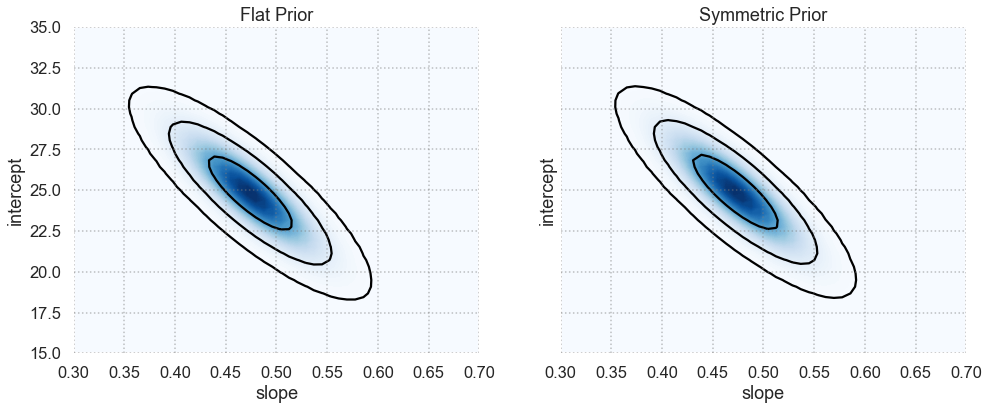

In [9]:
# Original Data
x, y, dy = make_data(*theta_true, rseed=42)
plot_results(x, y, dy)

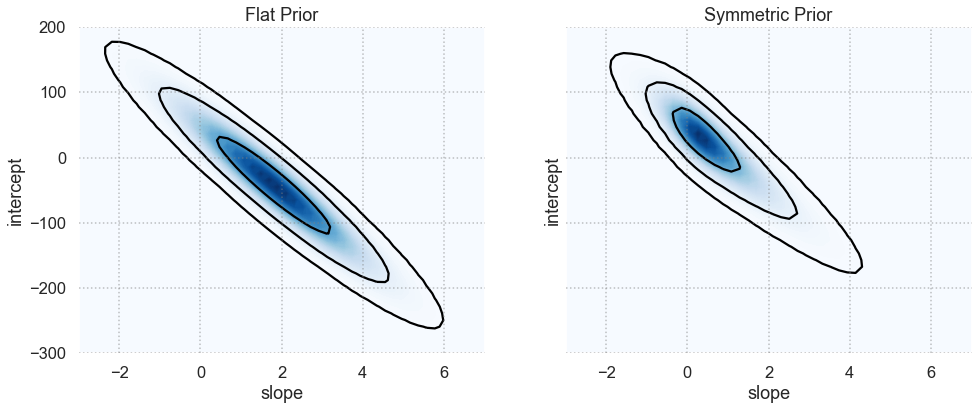

In [10]:
# Smaller number of data points and larger error bars
x2, y2, dy2 = make_data(*theta_true, N=3, dy=40, rseed=80)
plot_results(x2, y2, dy2,
             slope_limits=(-3, 7),
             intercept_limits=(-300, 200))

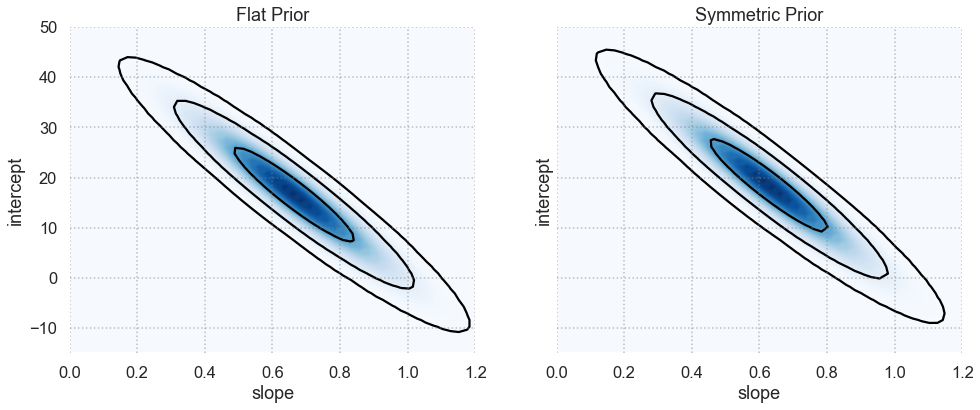

In [11]:
# Smaller number of data points, original error bars
x3, y3, dy3 = make_data(*theta_true, N=3, dy=5, rseed=80)
plot_results(x3, y3, dy3,
             slope_limits=(0, 1.2),
             intercept_limits=(-15, 50))

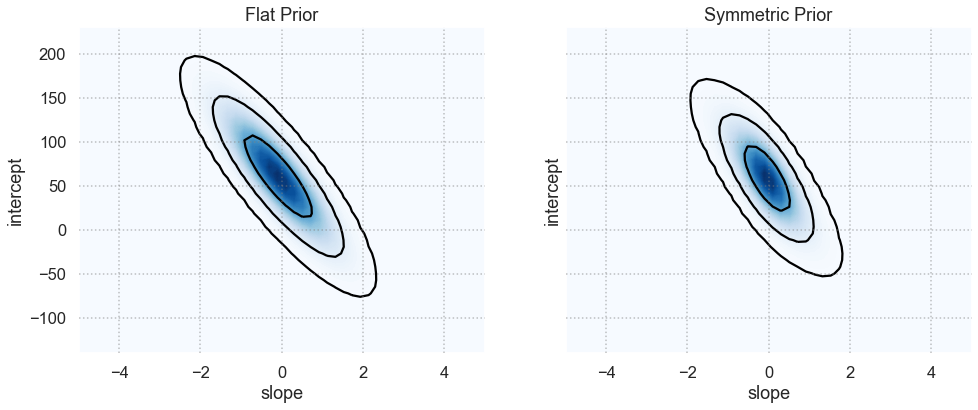

In [12]:
# Larger error bars, original number of data points
x4, y4, dy4 = make_data(*theta_true, N=20, dy=100, rseed=80)
plot_results(x4, y4, dy4,
             slope_limits=(-5, 5),
             intercept_limits=(-140, 230))

## Appendix B: Code for Part B

Set up

In [14]:
%matplotlib inline  
import numpy as np
from math import factorial
import scipy.stats as stats  
import scipy.integrate as integrate
from scipy import interpolate
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from mpl_toolkits import mplot3d
from matplotlib import cm

plt.rcParams.update({'font.size': 16})

def poisson(N, D):
    assert (isinstance(N, int) and N >= 0)
    return D**N * np.exp(-D) / factorial(N) 

def poisson_plot(ax, D, max_N):
    """
    Make a bar plot on the axis ax of the Poisson distribution for mu = D
    and out to a maximum integer max_N.
    """
    N_pts = np.arange(0, max_N, 1, dtype=int)
    poisson_pts = [poisson(int(N), D) for N in N_pts]
    ax.bar(N_pts, poisson_pts, width=0.8, bottom=None, align='center')
    ax.set_xlabel(r'Number of counts $N$')
    ax.set_ylabel(fr'$\mathrm{{p}}(N \mid D={D:.1f})$')
    ax.set_title(rf'$D = {D:.1f}$')
    return 0

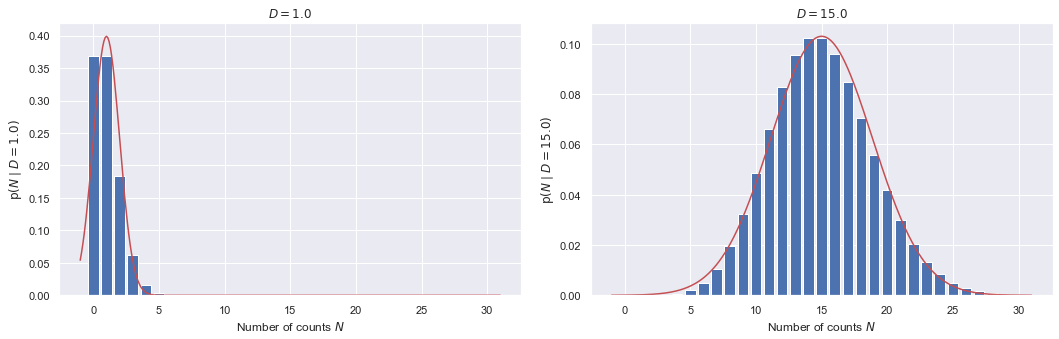

In [20]:
fig = plt.figure(figsize=(15,5))
x = np.linspace(-1, 31, 321)

D1 = 1
max_N1 = 9
ax1 = fig.add_subplot(1,2,1)
poisson_plot(ax1, D1, max_N1)
ax1.plot(x, stats.norm.pdf(x, loc=D1, scale=np.sqrt(D1)), "r")

ax2 = fig.add_subplot(1,2,2)
D2 = 15
max_N2 = 30
poisson_plot(ax2, D2, max_N2)
ax2.plot(x, stats.norm.pdf(x, loc=D2, scale=np.sqrt(D2)), "r")

fig.tight_layout()

In [21]:
A_true = 1.
B_true = 2.
width = np.sqrt(5.)   
x_0 = 0

def exact_data(A, B, n_0, x_k, x_0=0., width=np.sqrt(5.)):
    return n_0 * (A * np.exp(-(x_k - x_0)**2/(2.*width**2)) + B)

def make_dataset(A_true, B_true, width, x_0, databins, delta_x=1, D_max=100):
    # set up evenly spaced bins, centered on x_0
    x_max = x_0 + delta_x * (databins-1)/2
    xk_pts = np.arange(-x_max, x_max + delta_x, delta_x, dtype=int)
    
    # scale n_0 so maximum of the "true" signal plus background is D_max
    n_0 = D_max / (A_true + B_true)  
    Dk_pts = exact_data(A_true, B_true, n_0, xk_pts, width=width)
    
    # sample for each k to determine the measured N_k
    Nk_pts = [stats.poisson.rvs(mu=Dk) for Dk in Dk_pts]
    
    return xk_pts, Dk_pts, Nk_pts, x_max, n_0

def log_prior(A, B):
    A_max = 5.
    B_max = 5.
    # flat prior 
    if np.logical_and(A <= A_max, B <= B_max).all(): 
        return np.log(1/(A_max * B_max))
    else:
        return -np.inf

def log_likelihood(A, B, xk_pts, Nk_pts, n_0):
    Dk_pts = exact_data(A, B, n_0, xk_pts, width=width)
    try:
        return np.sum(Nk_pts * np.log(Dk_pts) - Dk_pts)
    except ValueError:
        return -np.inf
    
def log_posterior(A, B, xk_pts, Nk_pts, n_0):
    return log_prior(A, B) + log_likelihood(A, B, xk_pts, Nk_pts, n_0)

def normalize(y_pts, x_pts):
    return y_pts / integrate.simps(y_pts, x_pts)

def find_index(x_pts, x_value):
    return np.fabs(x_pts - x_value).argmin()

def find_contour_levels(grid):
    sorted_ = np.sort(grid.ravel())[::-1]
    pct = np.cumsum(sorted_) / np.sum(sorted_)
    cutoffs = np.searchsorted(pct, np.array([0.68, 0.95, 0.997]) ** 2)
    return np.sort(sorted_[cutoffs])

def make_figs(databins, delta_x, D_max, flag=False):
    xk_pts, Dk_pts, Nk_pts, x_max, n_0 = make_dataset(A_true, B_true, width, 
                                                      x_0, databins, delta_x, 
                                                      D_max)
    total_counts = np.sum(Nk_pts)
    
    # Figure 1.
    fig = plt.figure(figsize=(12,10))
    
    ax1 = fig.add_subplot(2,2,1)
    ax1.plot(xk_pts, Nk_pts, drawstyle='steps-mid', color='blue')
    ax1.set_xlim(-x_max, x_max)
    ax1.set_ylim(bottom = 0)
    ax1.set_xlabel(r'Measurement variable $x$')
    ax1.set_ylabel(r'Number of counts $N$')
    
    # Figure 2.  Can use contour or contourf.
    A_max = 3.; B_max = 3.
    A_pts = np.arange(0.01, A_max, .02)  # You may want to adjust the density
    B_pts = np.arange(0.01, B_max, .02)  #  of points used.
    A_grid, B_grid = np.meshgrid(A_pts, B_pts)    

    # Z_grid = Z(B, A) the way we define it here with a list comprehension.
    Z_grid = np.array([[log_posterior(A, B, xk_pts, Nk_pts, n_0) 
                        for A in A_pts] for B in B_pts])
    Z_grid = np.exp(Z_grid - np.max(Z_grid))  # normalize the peak to be 1
    ax2 = fig.add_subplot(2,2,2)
    ax2.axvline(A_true, color='gray', linestyle='--', alpha=0.8)
    ax2.axhline(B_true, color='gray', linestyle='--', alpha=0.8)

    ax2.contourf(A_grid, B_grid, Z_grid, levels=5, cmap='jet') 
    ax2.set_xlim(0., A_max)
    ax2.set_ylim(0., B_max)
    ax2.set_xlabel(r'Amplitude $A$')
    ax2.set_ylabel(r'Background $B$')
    
    # Figure 3.
    ax3 = fig.add_subplot(2,2,3) 
    B_true_index = find_index(B_pts, B_true)
    B_marginalized = [integrate.simps(Z_grid[:,i], B_pts) \
                                      for i in range(len(A_pts))]
    B_marginalized = normalize(B_marginalized, A_pts)
    B_true_fixed = Z_grid[B_true_index,:]
    B_true_fixed = normalize(B_true_fixed, A_pts)
    ax3.plot(A_pts, B_marginalized, color='blue', 
             label='marginalized over B')
    ax3.plot(A_pts, B_true_fixed, color='red', 
             linestyle='--', label='B = B_true')
    ax3.set_xlabel(r'Amplitude $A$')
    ax3.set_ylabel(r'${\rm p}(A | \{N_k\}, I)$')
    ax3.legend()
    
    # Figure 4.
    ax4 = fig.add_subplot(2,2,4)
    A_marginalized = [integrate.simps(Z_grid[j,:], A_pts) \
                                      for j in range(len(B_pts))]
    A_marginalized = normalize(A_marginalized, B_pts)
    ax4.plot(B_pts, A_marginalized, color='blue',
             label='marginalized over A')
    ax4.set_xlabel(r'Background $B$')
    ax4.set_ylabel(r'${\rm p}(B|\{N_k\}, I)$')
    ax4.legend()
    
    overall_title = f'Total counts = {total_counts},  ' \
                    + f'# of bins = {databins}' \
                    + '\n'
    fig.suptitle(overall_title, y=1.01)
    
    fig.tight_layout()
    
    if (flag):
        fig2 = plt.figure(figsize=(12,10))
        # Figure 1.
        ax2_1 = fig2.add_subplot(2,2,1)
        contour_levels = [0.2, 0.4, 0.6, 0.8, 1.0]
        ax2_1.contour(A_grid, B_grid, Z_grid, levels=contour_levels)
        ax2_1.axvline(A_true, color='gray', linestyle='--', alpha=0.8)
        ax2_1.axhline(B_true, color='gray', linestyle='--', alpha=0.8)
        ax2_1.set_xlim(0., A_max)
        ax2_1.set_ylim(0., B_max)
        ax2_1.set_xlabel(r'Amplitude $A$')
        ax2_1.set_ylabel(r'Background $B$')
        ax2_1.set_title('Contour plot with levels 0.2, 0.4, 0.6, 0.8, 1.0')
        
        # Figure 2.
        ax2_2 = fig2.add_subplot(2,2,2)
        ax2_2.contourf(A_grid, B_grid, Z_grid, levels=5, cmap='jet') 
        ax2_2.axvline(A_true, color='gray', linestyle='--', alpha=0.8)
        ax2_2.axhline(B_true, color='gray', linestyle='--', alpha=0.8)
        ax2_2.set_xlim(0., A_max)
        ax2_2.set_ylim(0., B_max)
        ax2_2.set_xlabel(r'Amplitude $A$')
        ax2_2.set_ylabel(r'Background $B$')
        ax2_2.set_title('Color contour plot with contourf')
        
        # Figure 3.
        ax2_3 = fig2.add_subplot(2,2,3, projection='3d')
        ax2_3.plot_surface(A_grid, B_grid, Z_grid, rstride=1, cstride=1, 
                           cmap='jet', linewidth=0, antialiased=False,
                           edgecolor='none')
        ax2_3.set_xlim(0., A_max)
        ax2_3.set_ylim(0., B_max)
        ax2_3.set_xlabel(r'Amplitude $A$')
        ax2_3.set_ylabel(r'Background $B$')
        ax2_3.set_title('Surface plot')
        
        # Figure 4.
        ax2_4 = fig2.add_subplot(2,2,4)
        ax2_4.contour(A_grid, B_grid, Z_grid, 
                      levels=find_contour_levels(Z_grid))
        ax2_2.axvline(A_true, color='gray', linestyle='--', alpha=0.8)
        ax2_2.axhline(B_true, color='gray', linestyle='--', alpha=0.8)
        ax2_4.set_xlim(0., A_max)
        ax2_4.set_ylim(0., B_max)
        ax2_4.set_xlabel(r'Amplitude $A$')
        ax2_4.set_ylabel(r'Background $B$')
        ax2_4.set_title('Contours at 68%, 95%, 99.7%')
        fig2.tight_layout()
                
    return fig

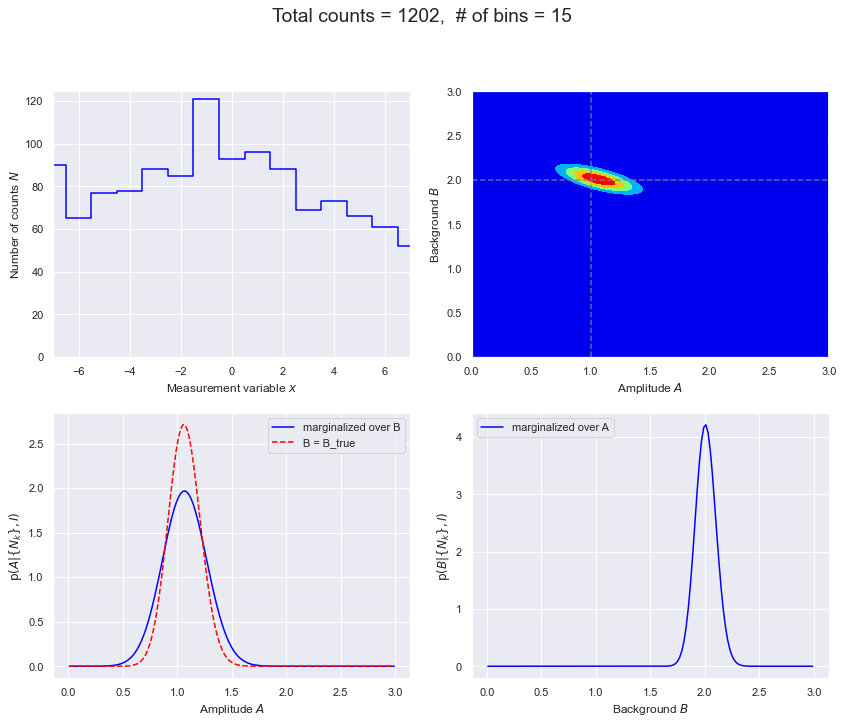

In [22]:
D_max = 100
databins = 15
delta_x = 1

fig = make_figs(databins, delta_x, D_max)

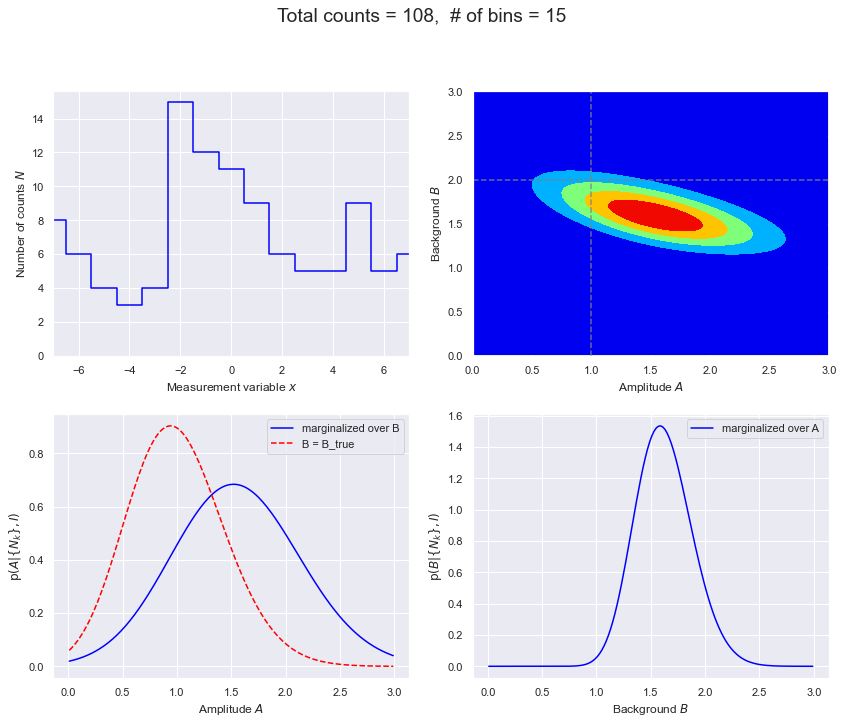

In [23]:
D_max = 10
databins = 15
delta_x = 1

fig = make_figs(databins, delta_x, D_max)

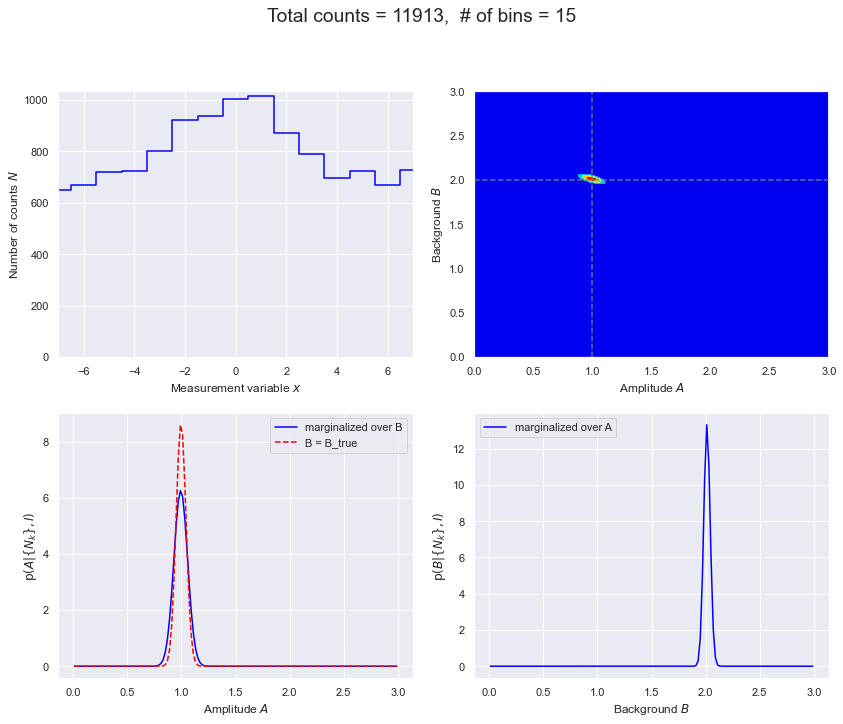

In [24]:
D_max = 1000
databins = 15
delta_x = 1

fig = make_figs(databins, delta_x, D_max)

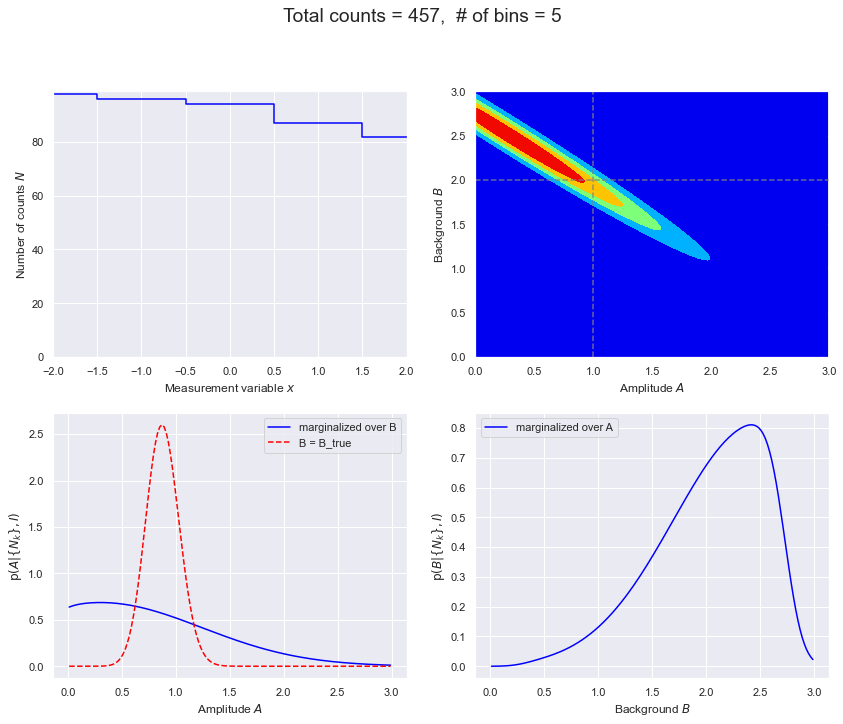

In [27]:
D_max = 100
databins = 5
delta_x = 1

fig = make_figs(databins, delta_x, D_max)

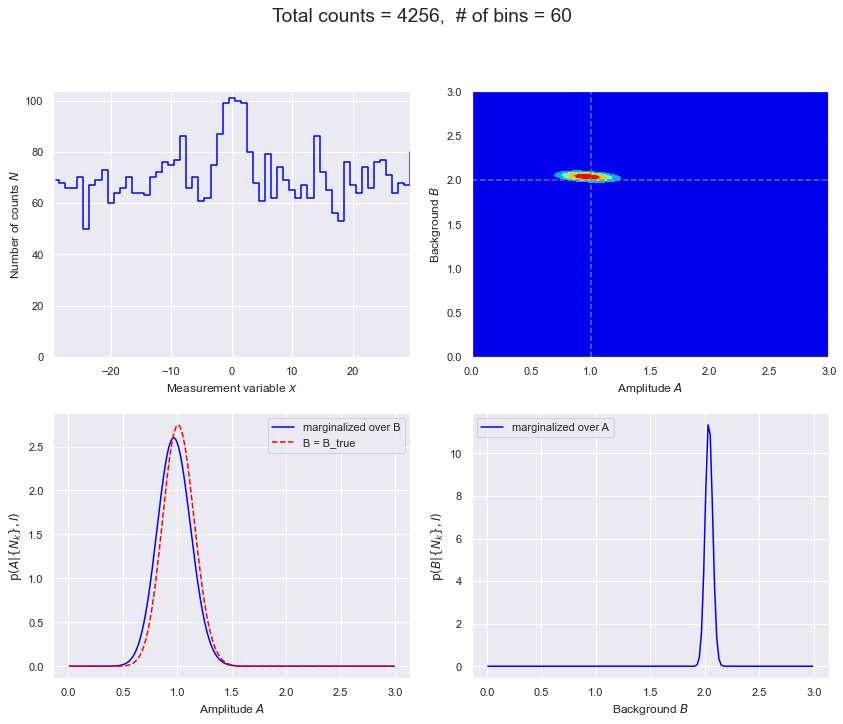

In [25]:
D_max = 100
databins = 60
delta_x = 1

fig = make_figs(databins, delta_x, D_max)

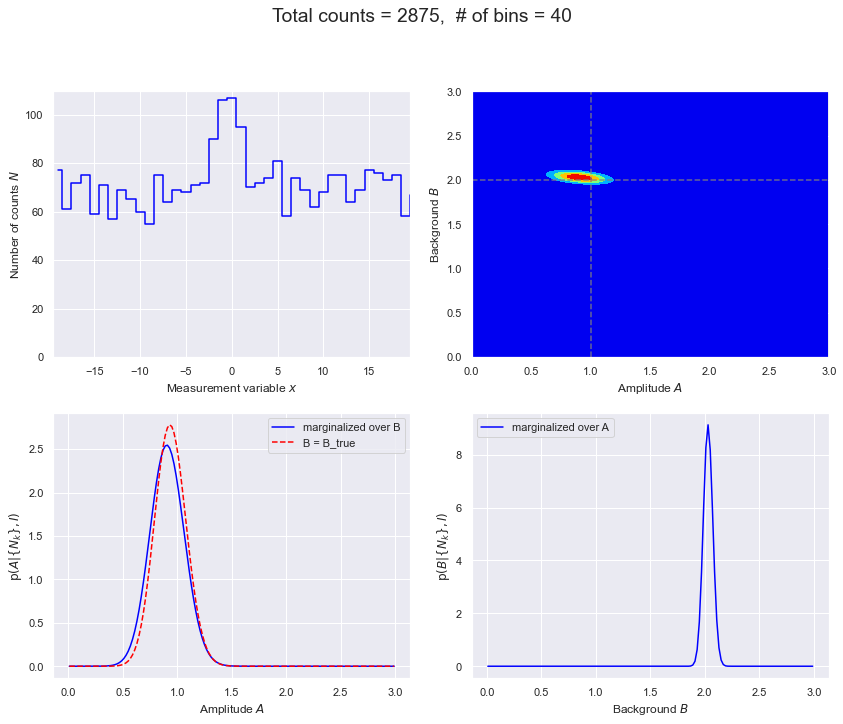

In [28]:
D_max = 100
databins = 40
delta_x = 1

fig = make_figs(databins, delta_x, D_max)

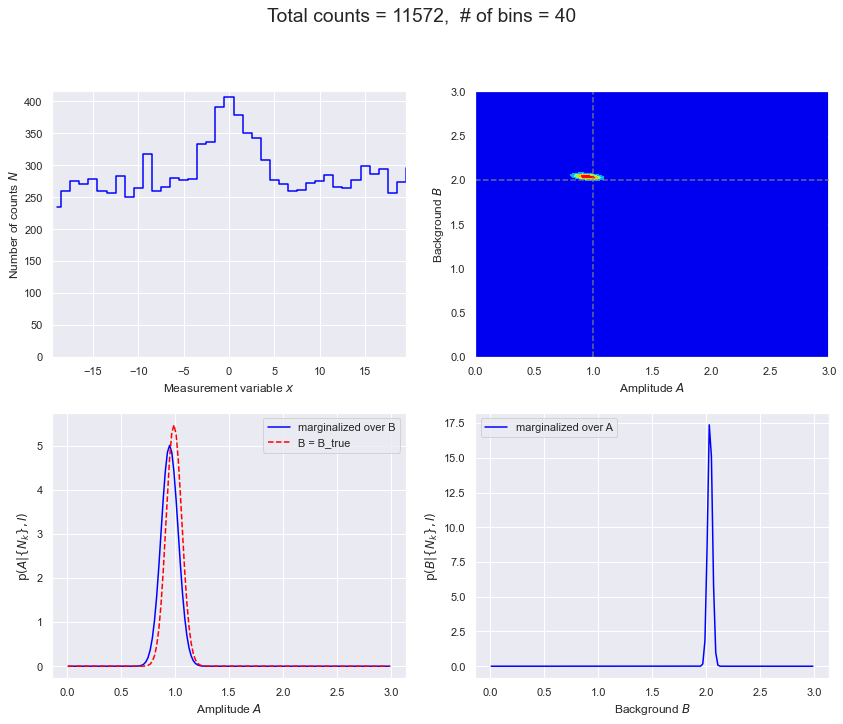

In [30]:
D_max = 400
databins = 40
delta_x = 1

fig = make_figs(databins, delta_x, D_max)